## Geometric Part

In [26]:
##################################################### Libraries ############################################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

##################################################### Define the geometry classes ##########################################
def RotateVector(vecVector, dAngle):
    dCoordX = np.cos(dAngle) * vecVector[0] + np.sin(dAngle) * vecVector[1]
    dCoordY = -np.sin(dAngle) * vecVector[0] + np.cos(dAngle) * vecVector[1]
    return np.array((dCoordX, dCoordY))
class Arrow2d:
    def __init__(self):
        self.m_dPntBase = np.array((0.0, 0.0))
        self.m_dPntHead = np.array((0.0, 0.0))
        self.m_dPntSideA = np.array((0.0, 0.0))
        self.m_dPntSideB = np.array((0.0, 0.0))
    def BuildArrow(self, gpPntBase, gpPntHead):
        self.m_dPntBase = gpPntBase
        self.m_dPntHead = gpPntHead
        gpVecArrow = self.m_dPntHead - self.m_dPntBase
        gpVecArrowInverse = -0.3 * gpVecArrow
        gpVecRotated =  + RotateVector(gpVecArrowInverse, np.pi/10)
        self.m_dPntSideA = self.m_dPntHead + RotateVector(gpVecArrowInverse, np.pi/10)
        self.m_dPntSideB = self.m_dPntHead + RotateVector(gpVecArrowInverse, -np.pi/10) 
    def AddEmptyArrowToPlot(self, grGraphic, strColor = 'black'):
        grGraphic.plot([self.m_dPntBase[0], self.m_dPntHead[0]], [self.m_dPntBase[1], self.m_dPntHead[1]], color = strColor)
        grGraphic.plot([self.m_dPntHead[0], self.m_dPntSideA[0]], [self.m_dPntHead[1], self.m_dPntSideA[1]], color = strColor)
        grGraphic.plot([self.m_dPntHead[0], self.m_dPntSideB[0]], [self.m_dPntHead[1], self.m_dPntSideB[1]], color = strColor)
##################################################################################################################

def InitializePlot():
    ## Define the original plot
    fig, grOriginalPlot = plt.subplots()
    
    # Define the x and y ranges
    x_range = (-1.5, 1.5)
    y_range = (-1.5, 1.5)
    grOriginalPlot.set_xlim(x_range)
    grOriginalPlot.set_ylim(y_range)
    
    return grOriginalPlot
##################################################################################################################

## Create the points
pnt00 = np.array((0.0, 0.0))
pnt10 = np.array((1.0, 0.0))
pnt01 = np.array((0.0, 1.0))

## Create the original arrows
arArrowAlpha, arArrowBeta = Arrow2d(), Arrow2d() 
arArrowAlpha.BuildArrow(pnt00, pnt10)
arArrowBeta.BuildArrow(pnt00, pnt01)


## Quantum Circuit

In [27]:
## Libraries
import numpy as np
import pennylane as qml

## Choose the problem params
nIndexOption = 4

## Depend on the variable 'nIndexOption'
if nIndexOption == 1:
    nCircuitQubitCount = 3
    nAuxiliarQubitCount = 1
    nTotalQubitCount = nCircuitQubitCount + nAuxiliarQubitCount
    vSolutionInBinary = ['101', '110']
    
if nIndexOption == 2:
    nCircuitQubitCount = 2
    nAuxiliarQubitCount = 1
    nTotalQubitCount = nCircuitQubitCount + nAuxiliarQubitCount
    
    ## Choose the solution of the problem
    vSolutionInBinary = ['11']

if nIndexOption == 3:
    nCircuitQubitCount = 5
    nAuxiliarQubitCount = 1
    nTotalQubitCount = nCircuitQubitCount + nAuxiliarQubitCount
    
    ## Choose the solution of the problem
    vSolutionInBinary = ['11000', '10100', '00010', '00101', '11001', '11011', '01000']

if nIndexOption == 4:
    nCircuitQubitCount = 5
    nAuxiliarQubitCount = 1
    nTotalQubitCount = nCircuitQubitCount + nAuxiliarQubitCount
    
    ## Choose the solution of the problem
    vSolutionInBinary = ['11000']

## Number of solution
nSolutionCount = len(vSolutionInBinary)
nStateCount = 2**nCircuitQubitCount

## Define the vector alpha and beta
vBetaVector = np.zeros(nStateCount)
for strSolution in vSolutionInBinary:
    nCurrentSolutionInInteger = int(strSolution, 2)
    vCurrentsolutionVector = np.zeros(nStateCount)
    vCurrentsolutionVector[nCurrentSolutionInInteger] = 1
    vBetaVector += vCurrentsolutionVector
vAlphaVector = np.zeros(nStateCount) + 1
vAlphaVector -= vBetaVector

## Normalize both vector
vAlphaVector /= np.sqrt(np.dot(vAlphaVector, vAlphaVector))
vBetaVector /= np.sqrt(np.dot(vBetaVector, vBetaVector))

## Apply Hadamard wires in a list of wires
def HadamardTransform(vWiresToApply):
    for itWire in vWiresToApply:
        qml.Hadamard(wires = itWire)
    return 

## Switch the sign
def SwitchSign(vWiresToApply):
    for itWire in vWiresToApply:
        qml.Uni
        qml.Hadamard(wires = itWire)
    return 


## Apply Oracle
def Oracle(vSolutionInBinary):
    for strSolution in vSolutionInBinary:
        qml.MultiControlledX(control_wires = range(len(strSolution)), wires = len(strSolution), control_values = strSolution)  
        #qml.MultiControlledX(wires = (range(len(strSolution)), len(strSolution)), control_values = strSolution)    
    return 

## Disfusor operator
def DifusorOperator(nQubits):
    HadamardTransform(range(nQubits))
    vStringCombo = ''.join(str(0) for j in range(nQubits))
    qml.MultiControlledX(control_wires = range(len(vStringCombo)), wires = len(vStringCombo), control_values = vStringCombo)
    qml.QubitUnitary(-np.eye(2), wires = 0)
    #qml.MultiControlledX(wires = (range(len(vStringCombo)), len(vStringCombo)), control_values = vStringCombo)
    HadamardTransform(range(nQubits))
    return

In [28]:
## Create the circuit
dev = qml.device('default.qubit', wires = nTotalQubitCount)

@qml.qnode(dev)
def GroverCircuit(nStepCount):
    ## Implement the Grover Circuit
    qml.PauliX(wires = nTotalQubitCount - 1)
    HadamardTransform(range(nTotalQubitCount))
    for nIndexStep in range(nStepCount):
        Oracle(vSolutionInBinary)
        DifusorOperator(nCircuitQubitCount)      
    ## Set to cero the auxiliar qubit
    qml.Hadamard(wires = nTotalQubitCount - 1)
    qml.PauliX(wires = nTotalQubitCount - 1)
    #return qml.probs(wires = range(nCircuitQubitCount))
    #return qml.probs(wires = nTotalQubitCount - 1)
    return qml.state()
nStepGrover = 0

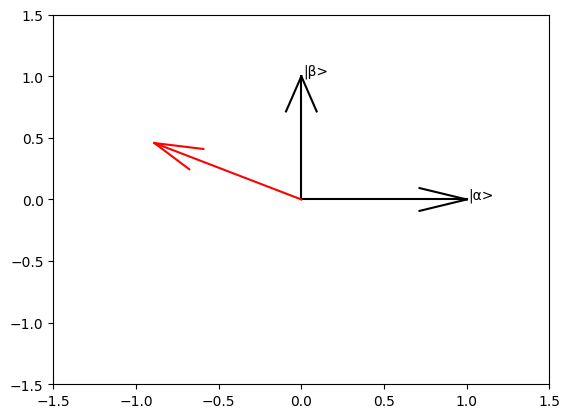

In [36]:
## Apply the Grover Circuit
tensorOutput = GroverCircuit(nStepGrover)
vOutput = np.real(tensorOutput.numpy())
vOutput = vOutput[np.array(2 * np.array((range(2**nCircuitQubitCount))))]
nStepGrover += 1

## Draw the output vector
pntMid = np.array((np.dot(vOutput, vAlphaVector), np.dot(vOutput, vBetaVector)))
arrArrowMid = Arrow2d()
arrArrowMid.BuildArrow(pnt00, pntMid)

## Draw the vectors
grOriginalPlot = InitializePlot()
arArrowAlpha.AddEmptyArrowToPlot(grOriginalPlot)
arArrowBeta.AddEmptyArrowToPlot(grOriginalPlot)
arrArrowMid.AddEmptyArrowToPlot(grOriginalPlot, 'red')
plt.annotate('|\u03B1>', xy=(1.01, 0.01), xytext=(1.01, 0.01))
plt.annotate('|\u03B2>', xy=(0.01, 1.01), xytext=(0.01, 1.01))
plt.show()